# Going Further With Hypothesis Based Testing

In the previous chapter, Statistical Tests From Scratch, we built up the intuition for hypothesis based testing - from probability to p-values.  We focused exclusively on probabilities more generally and then the normal distribution more specifically.  In this section we will relax the normality assumption and instead calculate p-values in the most general possible setting.

In order to account for this we will consider arbitrary distributions and restrict ourselves to the discrete case.  The continuous case is incredibly straight forward from there.

## Motivating Hypothesis Based Testing

The entire reason to do hypothesis based testing is to gather information, informed by reality.  So when you make statements, they can be backed up by real experiences.  Most of the time when we do statistics, it is informed by some scientific question, the goal being based around real world constraints.  

One fundamental truth of the world - data collection is expensive.  Suppose you wish to know how many votes a political candidate will receive when their election is called.  Or suppose you want to know how people feel about your product.  Or suppose you want to know how long a chair will last.  All of these problems involve sampling data.  The first two can be solved through a survey to individuals.  The third by testing some number of chairs.  Regardless of the set up, the goal is always the same - figure out what's going to happen.  

In a completely unrealistic scenario, for voting for president say, suppose you could ask every single voting american who they were going to vote for, and they had to tell you the truth.  Then you wouldn't need a sample.  And you wouldn't need hypothesis based testing.  You would ask, they would answer.  But reality is far more murky - people lie to pollsters, it's too expensive to literally ask everyone where they stand, and also some people will never talk to you.  So what do you do?  You sample - you get a collection of individuals together, willing to talk to you, and hopefully answer honestly about their voting behavior.  Then you try to compare this sample or perhaps many different samples (a single sample represents a collection of individuals in this case) with what you believe the population to be.  But how can you know how the population will behave, given that you don't know what the population will do?  You compare the samples and see how much variation there is amongst them.  If there is sufficient variation but your answers are similar, then you probably know how your population will behave!

This is generally called the data gathering and analysis phase of research.  You ask a question and then you try to answer it by measuring a bunch of different sources.  The goal is to make sure you have concensus, or said another way, that your answers are bullet proof.  That's because you considered a lot of different sources, and your conclusions hold in general.  Because it's expensive to gather data, sample sizes may vary.  And in some cases, may be too small to draw realistic conclusions.

One note, it's less expensive when you are gathering data from the internet, allowing for greater sample sizes, but that said, sampling is still an issue.  Suppose, you do make your data gathering vanishingly cheap, you may still have to do some human labeling, to understand what your data means.  The point being, there are always costs to learning things before you can make real and informed decisions.  

Before we jump into an example, there is one final point that needs to be made.  The biggest key insight to understand about hypothesis based testing and distributions is they are made up.  Basically, a bunch of statisticians looked at a lot of patterns that occurred in nature and planted flags.  They named these things, but they are just patterns of frequency, like any other pattern.  One key thing to understand, is hypothesis based testing involves some degree of pattern matching.  

The basic algorithm is:
* look at your data
* test to see if it's like some distribution we have a mathematical equation for
* draw insights and conclusions based on which distribution your data looks like

How can you do this last part?

Well, the _reason_ why people took the time to pattern match data to theoretical distributions is because you can do mathematics based on the theoretical mathematical equations.  That is, if you know what your data looks like, you can draw on the conclusions other people have already worked out.  And there is an eneromous body of literature and knowledge about the theoretical distributions.  Basically, you can stand on the shoulders of the giants that came before.  You don't have to figure everything out yourself!  

This, based on the above discussion does assume something though, _your data is representative_.  That is, your data actually looks, in aggregate, like your sample.  So a big part of the statistical techniques for hypothesis testing involve making sure this is the case.

## A First Example

Suppose you wanted to know how much ice cream you can expect to get and different ice cream shops around a given city, say New York City.  Each shop will have it's own distribution of sizes, depending on season, who works there and other factors.  

Let's start by assuming we have 10 ice cream shops.  And we have data for 5 days a piece, all at the same time of the year.  

* Which ice cream shop should we go to if we want the most ice cream?
* Which ice cream shop should we go to if we want the least ice cream?
* which ice cream shop should we go to if we want the most average amount of ice cream?

(array([  2.,   9.,  38., 125., 213., 257., 177., 117.,  51.,  11.]),
 array([232.58410898, 235.71251567, 238.84092236, 241.96932905,
        245.09773574, 248.22614243, 251.35454912, 254.48295581,
        257.6113625 , 260.73976919, 263.86817588]),
 <BarContainer object of 10 artists>)

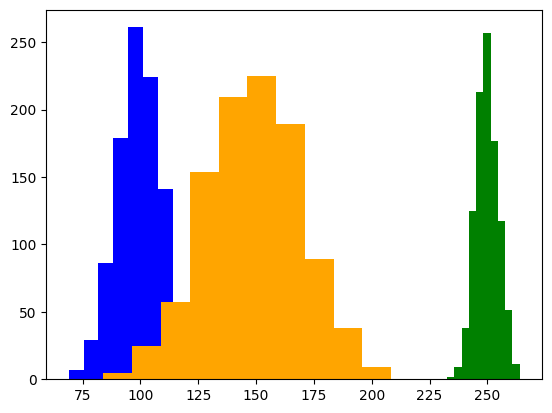

In [4]:
import numpy as np
import matplotlib.pyplot as plt

a = np.random.normal(100, 10, size=1000)
b = np.random.normal(150, 20, size=1000)
c = np.random.normal(250, 5, size=1000)

plt.hist(a, color='blue')
plt.hist(b, color='orange')
plt.hist(c, color='green')

From this visual inspection, we would guess that shop `c` will give us the most ice cream, shop `b` will give us the middle, and shop `a` will give us the least.

So, are we done?  Well no, because we collected 5 days of data around the same time of the year.  Honestly, that's probably not enough.  The hint is in the question - The amount of ice cream depends on the season, who works there, and other factors.  

Let's full sketch out more of the other factors:

* weather
* temperature
* tourism volume
* is there a global pandemic?
* population of the city
* average disposable income
* price of ice cream
* flavors available
* brand of ice cream
* how much marketing each store does
* location of shop

There are of course more factors to consider, but these factors at least help get us started.  One note, before we proceed.  You can think of different factors that may effect your experimental design or collection sort of like edge cases.  In the case of "is there a global pandemic?" this is most starkly obvious.  However, there are more subtle cases where edges may occur.  And accounting for different "fuzzy" states, where the boundaries may not be obvious, is key to statistical analysis.  It is also the basis for it's power.  When you only deal with the discrete and deterministic, you lose the power to really model the world.